In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle 

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset from CSV file

In [11]:
student = pd.read_csv('dataset.csv')

#### Once this data is in the DataFrame, we will perform following steps:
1. Understand the data
2. Pre-processing, Exploratory Data Analysis (EDA), Feature Selection
3. Extract Input and Output columns
4. Scaling the values
5. Splitting the data into Training & Testing Data
6. Training the model
7. Evaluate the model & Select the Model
8. Model Tuning
9. Model Deployement

## **Understanding the data**

In [12]:
# check the shape of the dataset in student DataFrame
student.shape

(4424, 35)

In [13]:
# See which are the 35 columns
student.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [14]:
# How the data looks
student.sample(4)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
829,1,14,1,14,1,1,1,3,14,4,...,0,6,0,0,0.0,0,15.5,2.8,-4.06,Dropout
1431,1,1,5,16,1,1,1,1,10,5,...,0,6,11,1,10.0,0,10.8,1.4,1.74,Dropout
992,1,1,1,15,1,1,1,1,3,4,...,0,6,7,6,11.0,0,11.1,0.6,2.02,Dropout
3334,1,1,6,15,1,1,1,23,28,10,...,0,6,13,5,11.8,0,7.6,2.6,0.32,Graduate


In [15]:
student.head(5) 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [16]:
# Check info about all the columns 
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

## **Pre-processing**

### Looks like there are no nulls or duplicates but still we can check and handle if required.

In [17]:
print(student.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [18]:
print(student.duplicated().sum())

0


#### Only **Target** column is non-numeric which we can convert to numeric
#### Note that **Target** column is a output column so we need it in numeric form so that we can find it's correlation with others

In [19]:
student['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

### So there are 3 unique values in target column which we can replace by 
* Dropout -> 0
* Enrolled -> 1
* Graduate -> 2

In [20]:
student['Target'] = student['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [21]:
# Check Target column, it must have filled with 0, 1 & 2
student

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [22]:
student.dtypes
# Target column is integer now

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [23]:
# Learn the data mathematically
student.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


### Finally find the correlation of Target with all other numeric columns

In [24]:
student.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

In [25]:
fig = px.imshow(student)
fig.show()

### Looking at the corelation, we need to select the required columns for prediction.

In [26]:
# This is the new Df considering relevant input and output columns
student_df = student.iloc[:,[1,11,13,14,15,16,17,20,22,23,26,28,29,34]]

In [27]:
student_df.head()

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,8,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000,0
1,6,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667,2
2,1,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000,0
3,8,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000,2
4,12,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000,2


In [28]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application mode                     4424 non-null   int64  
 1   Displaced                            4424 non-null   int64  
 2   Debtor                               4424 non-null   int64  
 3   Tuition fees up to date              4424 non-null   int64  
 4   Gender                               4424 non-null   int64  
 5   Scholarship holder                   4424 non-null   int64  
 6   Age at enrollment                    4424 non-null   int64  
 7   Curricular units 1st sem (enrolled)  4424 non-null   int64  
 8   Curricular units 1st sem (approved)  4424 non-null   int64  
 9   Curricular units 1st sem (grade)     4424 non-null   float64
 10  Curricular units 2nd sem (enrolled)  4424 non-null   int64  
 11  Curricular units 2nd sem (appr

<AxesSubplot:>

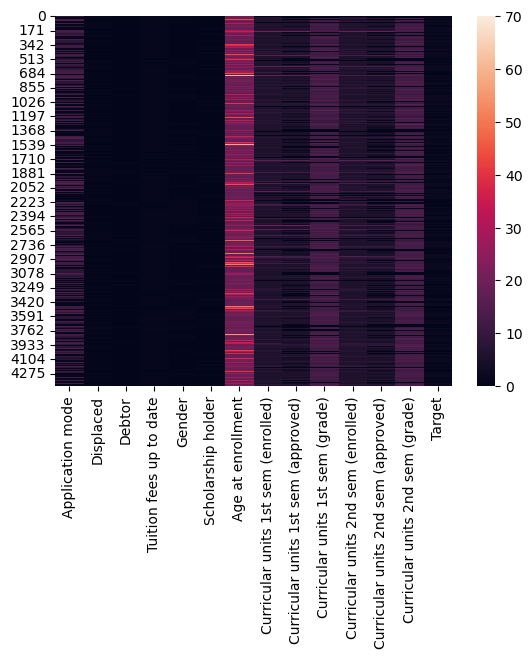

In [29]:

sns.heatmap(student_df)

## **EDA -  We will perform Exploratory Data Analysis on student_df**

In [30]:
# How many dropouts, enrolled & graduates are there in Target column
student_df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [31]:
# Plot the above values
x = student_df['Target'].value_counts().index
y = student_df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [32]:
# Now see the corelation of Target with the rest
student_df.corr()['Target']

Application mode                      -0.212025
Displaced                              0.113986
Debtor                                -0.240999
Tuition fees up to date                0.409827
Gender                                -0.229270
Scholarship holder                     0.297595
Age at enrollment                     -0.243438
Curricular units 1st sem (enrolled)    0.155974
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Target                                 1.000000
Name: Target, dtype: float64

### Let's plot the column ***Curricular units 2nd sem (approved)*** againt ***Curricular units 1st sem (approved)*** and differentiate ***Target*** by color

In [33]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

### Let's plot the column ***Curricular units 1st sem (grade)*** againt ***Curricular units 1st sem (grade)*** and differentiate ***Target*** by color

In [34]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (grade)',
             y = 'Curricular units 2nd sem (grade)',
             color = 'Target')
fig.show()

In [35]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [36]:
fig = px.box(student_df, y='Age at enrollment')
fig.show()

<AxesSubplot:xlabel='Age at enrollment', ylabel='Count'>

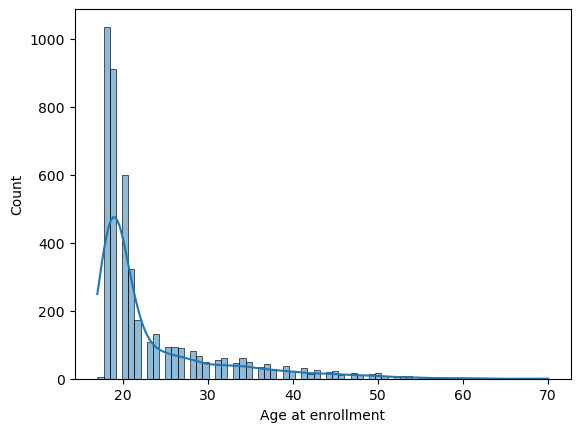

In [37]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=student_df['Age at enrollment'], kde=True)

In [38]:
# Let's try plotly histogram for interactive figure
px.histogram(student_df['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['red'])

## Extract Input & Output Columns

In [39]:
X = student_df.iloc[:,0:13]
y = student_df.iloc[:,-1]
X

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,8,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000
1,6,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667
2,1,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000
3,8,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000
4,12,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,0,0,1,1,0,19,6,5,13.600000,6,5,12.666667
4420,1,1,1,0,0,0,18,6,6,12.000000,6,2,11.000000
4421,1,1,0,1,0,1,30,7,7,14.912500,8,1,13.500000
4422,1,1,0,1,0,1,20,5,5,13.800000,5,5,12.000000


## **Splitting the data into Training & Testing Data**

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 13)
(885, 13)
(3539,)
(885,)


## **Training the model**

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Without Scaling 
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7728813559322034
Without Scaling and With CV:  0.7651838158800275


### SGD - Stochastic Gradient Descent

In [43]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3)

# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7548022598870057
Without Scaling and With CV:  0.6520902354315712


### Perceptron

In [44]:
from sklearn.linear_model import Perceptron
# this is same as SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)

clf = Perceptron(tol=1e-3, random_state=0)
# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.5638418079096045
Without Scaling and With CV:  0.6792993069893247


### Logistic Regression CV

In [45]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0)

# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7751412429378531
Without Scaling and With CV:  0.7640514716473807


### Decision Tree Classifier

In [46]:
# Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6836158192090396
Without Scaling and With CV:  0.6806981322321985


### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7728813559322034
Without Scaling and With CV:  0.7671596165234231


### Suppport Vector Machines

In [48]:
from sklearn.svm import SVC
#clf = SVC(gamma='auto')

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())


Without Scaling and without CV:  0.7548022598870057
Without Scaling and With CV:  0.7612258126470447


### NuSVC

In [49]:
from sklearn.svm import NuSVC
clf = NuSVC()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7401129943502824
Without Scaling and With CV:  0.7267609353243386


### Linear SVC

In [50]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.3898305084745763
Without Scaling and With CV:  0.6747827339511212


## Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

#y_pred = gnb.fit(X_train, y_train).predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7220338983050848
Without Scaling and With CV:  0.7109417262847907


In [52]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6384180790960452
Without Scaling and With CV:  0.6645908356140267


In [53]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6937853107344633
Without Scaling and With CV:  0.6872017093196332


In [55]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))

IndexError: index 18 is out of bounds for axis 1 with size 18

### K Nearest Neighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7084745762711865
Without Scaling and With CV:  0.7106512379763448


## Model Selection

#### Select the model which gives maximum accuracy. So we select Random Forest with accuracy 76.94 & 77.08 with Cross Validation

In [57]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)

print("With CV: ",scores.mean())
print("Precision Score: ", precision_score(y_test, y_pred,average='macro'))
print("Recall Score: ", recall_score(y_test, y_pred,average='macro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='macro'))

Without CV:  0.7728813559322034
With CV:  0.7671596165234231
Precision Score:  0.7175991988253205
Recall Score:  0.6943123543123543
F1 Score:  0.7021298891221993


In [58]:
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [5,8,10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier()

clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print(clf.best_params_)
print(clf.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.7774011299435029
{'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestClassifier(max_depth=10, max_features=3, n_estimators=300)


In [59]:
clf = RandomForestClassifier(bootstrap=False, max_depth=10,max_features=3,
                             min_samples_split=12,
                             n_estimators=100, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("With CV: ",scores.mean())

print("Precision Score: ", precision_score(y_test, y_pred,average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred,average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='micro'))

Without CV:  0.7728813559322034
With CV:  0.7654647012691858
Precision Score:  0.7728813559322034
Recall Score:  0.7728813559322034
F1 Score:  0.7728813559322033
